<a href="https://colab.research.google.com/github/dasxgo/titanic_arboll_decision/blob/main/arbol_decision_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arbol de decision con scikit learn

## Importamos las librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Cargamos el dataset a utilizar

In [3]:
titanic = pd.read_csv('/content/titanic.csv', sep = ',')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Exploracion de datos

## Elimanamos columnas que no nos interesan

In [6]:
columns_to_drop = ['Name', 'Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace = True)

## Renombramos las columnas

In [7]:
titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch']
titanic.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Analizamos el shape del objeto

In [8]:
titanic.shape

(887, 6)

## Visualizamos los tipos de datos

In [9]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Sibsp         int64
Parch         int64
dtype: object

## Cambiamos los tipos de datos

In [10]:
titanic = pd.get_dummies(titanic, columns = ['Sex'], drop_first = True)

In [11]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
Sibsp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [13]:
titanic.head()

,Survived,Pclass,Age,Sibsp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [14]:
# Remplazar el DataFrame

titanic.rename(columns ={'Sex_male': 'Sex'}, inplace = True)

In [15]:
# Ordenar columnas por nombre

titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch']]
titanic.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


### Entrenamiento de arbol de decision con scikit learn

In [16]:
# Separamos en X e y 

X = titanic.drop('Survived', axis = 1)
y = titanic.Survived

In [18]:
# Importamos librerias

from sklearn.model_selection import train_test_split

# 30 % para test 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 00000)


## Arbol de Decision

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Creacion de modelo

tree = DecisionTreeClassifier(max_depth=2, random_state = 00000)

## Entrenamiento

In [20]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluacion de modelo

In [21]:
# Calulo de las p rediciones en Train y Test

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [24]:
#Calculo de metricas

from sklearn.metrics import accuracy_score

#Calculo de accuracy en Train

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)

El accuracy en train es: 0.8048387096774193
El accuracy en test es: 0.7640449438202247


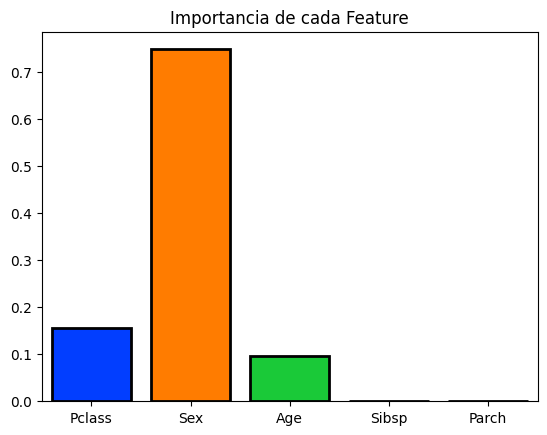

In [31]:
# Verificamos el feature importances

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

Que podemos llevanos de este ejemplo?

Podemos observar que para la clasificacion del modelo en la base a la variable target:Survived, los features mas importantes son: Sex, seguido de Pclass y luego Age. Tambien es importante destacar que se observa un perfomance parecida en la metrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo.